# <font Color = 'blue'>Lending Club Case Study


#### _Importing required packages_

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### _Setting up required parameters_

In [2]:
#Setting required parameters
pd.options.display.float_format = '{:.2f}'.format #formatting decimal points
pd.set_option('display.max_columns', 100) #setting to display all columns

#### _Loading source files_

In [4]:
#loading csv file to analyze lenading case study
df_loan_csv = pd.read_csv('D:\Study\ML and AI\Loan Assignment\loan\loan.csv')
df_loan_csv.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

In [5]:
df_loan_csv.shape

(39717, 111)

### Data cleanup
***
* <font color = red> _We will remove redundant data_</font>
 1. no need of months appended with term. e.g 36 months can be only 36
* <font color = red> _we will remove columns which are not required to do the case study_</font>
 1.  All application types are individual
 2.  All policy_code values are 1
 3.  All collections_12_mths_ex_med are either 0 or NA
 4.  next_pymnt_d values are mostly blnk
 5.  Column values from BB till DH are either NA or 0


In [6]:
df_loan_csv.columns.get_loc('collections_12_mths_ex_med')

49

In [7]:
df_loan_csv.columns.get_loc('total_il_high_credit_limit')

110

In [10]:
#taking a subset of df_loan_csv from column index 0 to 48
df_loan = df_loan_csv.iloc[:,0:49]
df_loan.shape


(39717, 49)

In [11]:
#Also we dont need the url,desc,emp_title,zip_code,id,member_id,addr_state in this analysis

df_loan = df_loan.drop(['url','desc','emp_title','zip_code','id','member_id','addr_state'],axis=1)
df_loan.shape

(39717, 42)

In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
purpose                    39717 non-null object
title                      39706 non-null object
dti                        39717 non-null float64
delinq_

In [372]:
#We have total 42 columns now. Lets remove the columns where  more that 50% values are missing
df_loan.isnull().sum(axis=0)

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

In [373]:
#Lets remove columns 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d' has mostly missing values
df_loan = df_loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
df_loan.shape

(39717, 39)

In [374]:
#Now we have only 39 columns left with us to do further data cleanup

In [375]:
#Checkign unique values in each column to define categorical variables
df_loan.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
purpose                       14
title                      19615
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
initial_list_status            1
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymn

#### 'pymnt_plan','initial_list_status' has only one unique value so lets remove these two columns         

In [376]:
df_loan= df_loan.drop(['pymnt_plan','initial_list_status'],axis=1)

In [377]:
df_loan.shape

(39717, 37)

#### Now lets check which columns has >50% missing values

In [378]:
df_loan_missing_values = df_loan.isnull().sum()
df_loan_missing_values

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [379]:
#As we can see emp_length has 1075 missing values lets fill these with mode of emp_length
df_loan['emp_length'].mode()

0    10+ years
dtype: object

##### Terms has only two inuque values: 36 months & 60 months. We will replace these values with 36 months : 0 & 60 months : 1

In [13]:
df_loan['term'] = [0 if i.strip() == '36 months' else 1 for i in df_loan['term']]

In [14]:
#df_loan

In [15]:
df_loan_c = df_loan.copy()

In [16]:
# Removing % from int_rate & revol_util
df_loan['int_rate']=df_loan['int_rate'].str.replace('%',"").astype(float)
df_loan['revol_util']=df_loan['revol_util'].str.replace('%',"").astype(float)

#df_loan

In [17]:
#We need to make emp_length numeric. So let's check the unique values in this column
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
##### We need to replace nan with zero and have to remove year or years or + to make this column numeric
#As we have <1 year and 1 year so let's replace <1year to 0.5
df_loan['emp_length'] = ["0.5" if i=='< 1 year' else i for i in df_loan['emp_length']]
#df_loan

In [19]:
#now removing other characters using regex e.g. 10+ years will be 10, 3 years will be 3 and replacing nan to 0
df_loan['emp_length'] = df_loan['emp_length'].replace('[^0-9.]','',regex=True).fillna(0)
df_loan['emp_length'].unique()

array(['10', '0.5', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0],
      dtype=object)

In [20]:
#Removing duplicate rows if there is nay
df_loan = df_loan.drop_duplicates()
df_loan.shape

(39717, 42)

In [25]:
#Now lets save this DF in a seperate csv and we will work on that CSV here onwards.
df_loan.to_csv("D:\Study\ML and AI\Loan Assignment\loan\df_loan_cleaned.csv",encoding='utf-8', index=False)


In [26]:
#Reading data from cleaned CSV 
df_loan_cleaned = pd.read_csv('D:\Study\ML and AI\Loan Assignment\loan\df_loan_cleaned.csv')
#df_loan_cleaned

C:\Users\Soumya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
#Removing duplicate rows if there is nay
df_loan_cleaned = df_loan_cleaned.drop_duplicates()
df_loan_cleaned.shape

(39717, 42)

In [29]:
#Lets format the dates now
df_loan_cleaned.issue_d = pd.to_datetime(df_loan_cleaned.issue_d, format='%b-%y')
df_loan_cleaned.earliest_cr_line = pd.to_datetime(df_loan_cleaned.earliest_cr_line, format='%b-%y')
df_loan_cleaned.last_pymnt_d = pd.to_datetime(df_loan_cleaned.last_pymnt_d, format='%b-%y')
df_loan_cleaned.last_credit_pull_d = pd.to_datetime(df_loan_cleaned.last_credit_pull_d, format='%b-%y')
df_loan_cleaned

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,5000,5000,4975.00,0,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,27.65,0,1985-01-01,1,nan,nan,3,0,13648,83.70,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaN,2016-05-01
1,2500,2500,2500.00,1,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,2011-12-01,Charged Off,n,car,bike,1.00,0,1999-04-01,5,nan,nan,3,0,1687,9.40,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaN,2013-09-01
2,2400,2400,2400.00,0,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,8.72,0,2001-11-01,2,nan,nan,2,0,2956,98.50,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaN,2016-05-01
3,10000,10000,10000.00,0,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,n,other,personel,20.00,0,1996-02-01,1,35.00,nan,10,0,5598,21.00,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaN,2016-04-01
4,3000,3000,3000.00,1,12.69,67.79,B,B5,1.00,RENT,80000.00,Source Verified,2011-12-01,Current,n,other,Personal,17.94,0,1996-01-01,0,38.00,nan,15,0,27783,53.90,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,Jun-16,2016-05-01
5,5000,5000,5000.00,0,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,n,wedding,My wedding loan I promise to pay back,11.20,0,2004-11-01,3,nan,nan,9,0,7963,28.30,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,NaN,2016-01-01
6,7000,7000,7000.00,1,15.96,170.08,C,C5,8.00,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,n,debt_consolidation,Loan,23.51,0,2005-07-01,1,nan,nan,7,0,17726,85.60,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,NaN,2016-05-01
7,3000,3000,3000.00,0,18.64,109.43,E,E1,9.00,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,5.35,0,2007-01-01,2,nan,nan,4,0,8221,87.50,4,f,0.00,0.00,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,NaN,2014-12-01
8,5600,5600,5600.00,1,21.28,152.39,F,F2,4.00,OWN,40000.00,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,5.55,0,2004-04-01,2,nan,nan,11,0,5210,32.60,13,f,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,NaN,2012-08-01
9,5375,5375,5350.00,1,12.69,121.45,B,B5,0.50,RENT,15000.00,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,18.08,0,2004-09-01,0,nan,nan,2,0,9279,36.50,3,f,0.00,0.00,1476.19,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,NaN,2013-03-01


In [31]:
df_loan_cleaned['loan_status'] = df_loan_cleaned['loan_status'].astype('category')
df_loan_cleaned['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [32]:
# filtering only fully paid or charged-off
df_loan_cleaned = df_loan_cleaned[df_loan_cleaned['loan_status'] != 'Current']
df_loan_cleaned['loan_status'] = df_loan_cleaned['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df_loan_cleaned['loan_status'] = df_loan_cleaned['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df_loan_cleaned['loan_status'].value_counts()

C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    32950
1     5627
Name: loan_status, dtype: int64

In [33]:
##### DATA Analysys
# default rate
round(np.mean(df_loan_cleaned['loan_status']), 2)

0.15

C:\Users\Soumya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


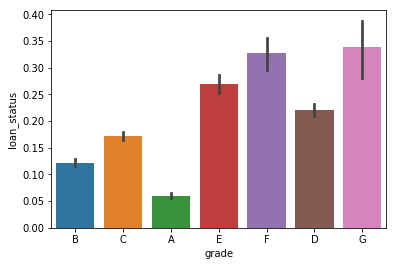

In [35]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df_loan_cleaned)
plt.show()

In [37]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df_loan_cleaned)
    plt.show()

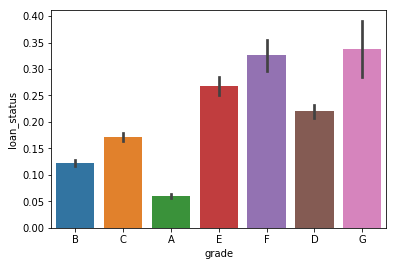

In [38]:
# compare default rates across grade of loan
plot_cat('grade')

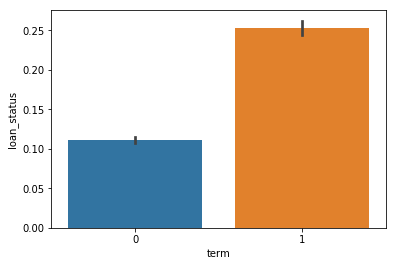

In [39]:
# term: 60 months loans default more than 36 months loans
plot_cat('term')

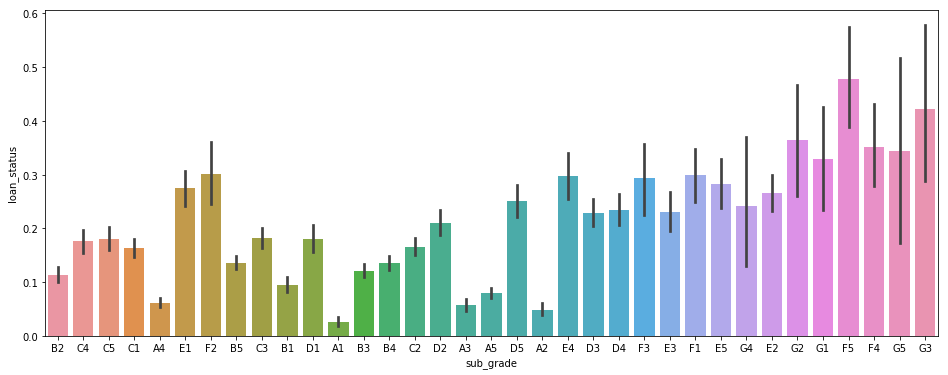

In [40]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

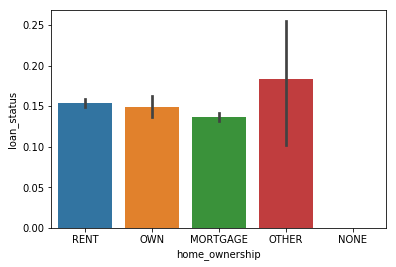

In [41]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

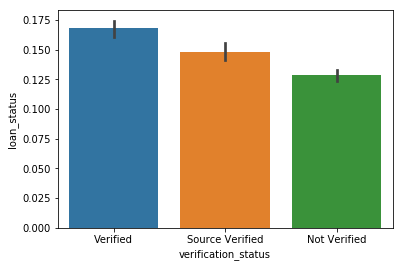

In [42]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

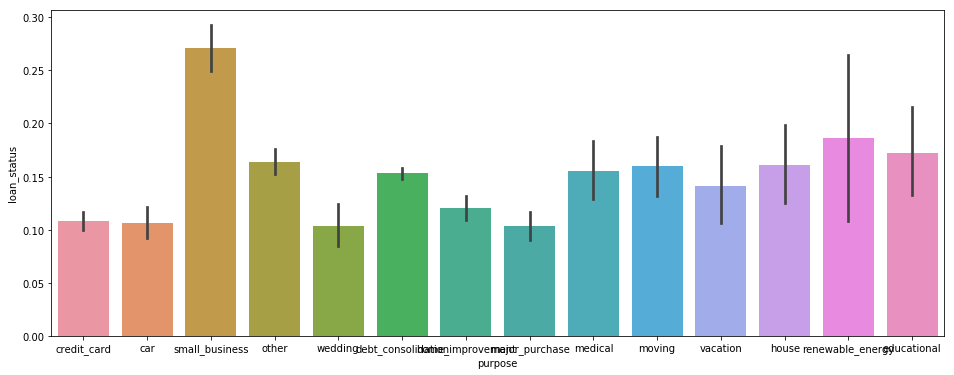

In [43]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In [45]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df_loan_cleaned['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [52]:
# extracting month and year from issue_date
df_loan_cleaned['month'] = df_loan_cleaned['issue_d'].apply(lambda x: x.month)
df_loan_cleaned['year'] = df_loan_cleaned['issue_d'].apply(lambda x: x.year)


C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# let's first observe the number of loans granted across years
df_loan_cleaned.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [57]:
# number of loans across months
df_loan_cleaned.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

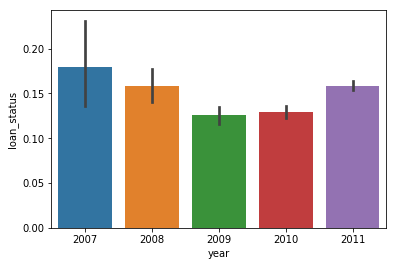

In [59]:
# comparing the default rates across years. We can do similar for month
plot_cat('year')

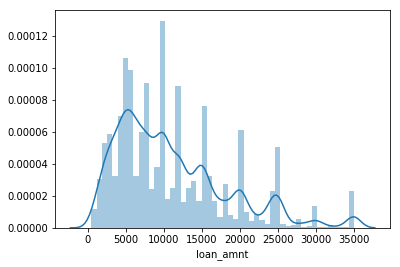

In [61]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df_loan_cleaned['loan_amnt'])
plt.show()

In [64]:
#Let's bin the loan amount variable into small, medium, high, very high.
def loan_amount_binning(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df_loan_cleaned['loan_amnt'] = df_loan_cleaned['loan_amnt'].apply(lambda x: loan_amount_binning(x))

C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


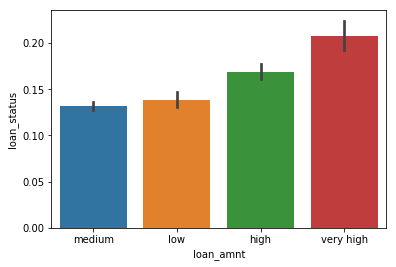

In [65]:
# comaring default rates across loan amount type
plot_cat('loan_amnt')

In [66]:
# convert funded amount invested to bins
df_loan_cleaned['funded_amnt_inv'] = df_loan_cleaned['funded_amnt_inv'].apply(lambda x: loan_amount_binning(x))

C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


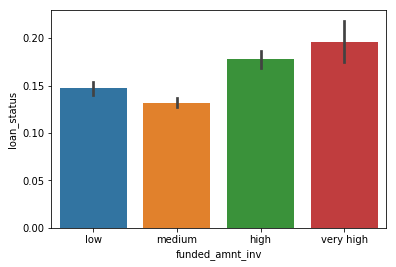

In [67]:
plot_cat('funded_amnt_inv')

In [69]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df_loan_cleaned['dti'] = df_loan_cleaned['dti'].apply(lambda x: dti(x))

C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


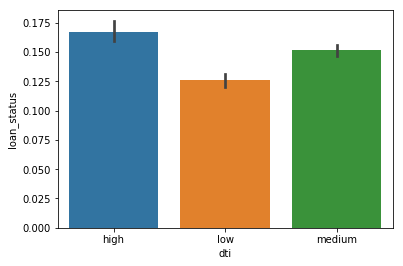

In [70]:
plot_cat('dti')

C:\Users\Soumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


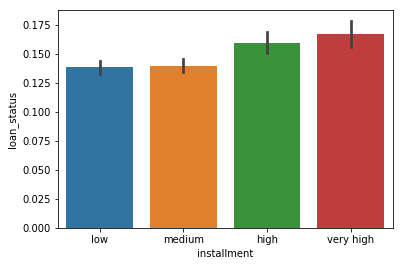

In [72]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df_loan_cleaned['installment'] = df_loan_cleaned['installment'].apply(lambda x: installment(x))
plot_cat('installment')

In [ ]:
# employment length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'
